In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
wv_data = pd.read_excel(r'data/wv_data.xlsx')
trainer_data = pd.read_excel('trainer_table_S1.xlsx')

In [97]:
CH_data = pd.read_excel(r'data/CH4_situ.xlsx')
CH_data

,sol,CH4_situ,error
0,79.96,-0.510,2.830
1,81.89,1.430,2.470
2,106.14,0.690,2.150
3,293.16,0.560,2.140
4,305.58,5.780,2.270
5,314.14,2.130,2.030
6,467.14,5.480,2.190
7,475.14,6.880,2.110
8,505.12,6.910,1.840
9,525.56,9.340,2.160


In [4]:
sol = [row[1] for (index, row) in trainer_data.iterrows()]
x = [row[0] for (index, row) in trainer_data.iterrows()]

CO2 = [row[4] for (index, row) in trainer_data.iterrows()]
CO2_std = [row[5] for (index, row) in trainer_data.iterrows()]

Ar = [row[6] for (index, row) in trainer_data.iterrows()]
Ar_std = [row[7] for (index, row) in trainer_data.iterrows()]

N2 = [row[8] for (index, row) in trainer_data.iterrows()]
N2_std = [row[9] for (index, row) in trainer_data.iterrows()]

O2 = [row[10] for (index, row) in trainer_data.iterrows()]
O2_std_plus = [row[11] for (index, row) in trainer_data.iterrows()]
O2_std_minus = [row[12] for (index, row) in trainer_data.iterrows()]

CO = [row[13] for (index, row) in trainer_data.iterrows()]
CO_std = [row[14] for (index, row) in trainer_data.iterrows()]


In [123]:
CH = CH_data.CH4_situ
CH_error = CH_data.error
CH_sol = CH_data.sol

CH = [e for e in CH if e <= 5]
CH_sol = [e[0] for e in zip(CH_sol, CH) if e[1] <= 5]
CH_err = [e[0] for e in zip(CH_error, CH) if e[1] <= 5]

In [6]:
# get the err for ratios
import math
def get_err_from_ratios(A, err_A, B, err_B):
    sqrt_div_1 = [e ** 2 for e in np.divide(err_A, B)]
    B_sqrt = [e ** 2 for e in B]
    neg_div_2 = [-e for e in np.divide(err_A, B_sqrt)]
    sqrt_prod_div_2 = [e ** 2 for e in np.multiply(neg_div_2, err_B)]
    final_std_sqrt = np.add(sqrt_div_1, sqrt_prod_div_2)
    sqrt_std = [math.sqrt(e) for e in final_std_sqrt]
    return sqrt_std

In [7]:
sol = [row[1] for (index, row) in trainer_data.iterrows()]
trainer_Ls = [row[0] for (index, row) in trainer_data.iterrows()]

CO2 = [row[4] for (index, row) in trainer_data.iterrows()]
CO2_std = [row[5] for (index, row) in trainer_data.iterrows()]

Ar = [row[6] for (index, row) in trainer_data.iterrows()]
Ar_std = [row[7] for (index, row) in trainer_data.iterrows()]

N2 = [row[8] for (index, row) in trainer_data.iterrows()]
N2_std = [row[9] for (index, row) in trainer_data.iterrows()]

O2 = [row[10] for (index, row) in trainer_data.iterrows()]
O2_std_plus = [row[11] for (index, row) in trainer_data.iterrows()]
O2_std_minus = [row[12] for (index, row) in trainer_data.iterrows()]

CO = [row[13] for (index, row) in trainer_data.iterrows()]
CO_std = [row[14] for (index, row) in trainer_data.iterrows()]

In [8]:
CO_Ar_ratio = np.divide(CO, Ar)
N2_Ar_ratio = np.divide(N2, Ar)
O2_Ar_ratio = np.divide(O2, Ar)

filtered_CO_ratio = [e for e in CO_Ar_ratio if e > 0]
O2_ratio_ave = np.mean(O2_Ar_ratio)
N2_ratio_ave = np.mean(N2_Ar_ratio)
CO_ratio_ave = np.mean(filtered_CO_ratio)

In [9]:
normalized_CO = np.divide(CO_Ar_ratio, CO_ratio_ave)
normalized_O2 = np.divide(O2_Ar_ratio, O2_ratio_ave)
normalized_N2 = np.divide(N2_Ar_ratio, N2_ratio_ave)

In [10]:
wv = [row[5] for (index, row) in wv_data.iterrows()]
x_time = [row[0] for (index, row) in wv_data.iterrows()]
int_time = [int(e) for e in x_time]
max_day = int(x_time[-1])
day_total = [e + 1 for e in range(max_day)]

# wv ranged by day(sol)
ranged_y = [[e[1] for e in zip(int_time, wv) if e[0] == day] for day in day_total]

# get the average of them
full_day_index = [i for i in range(len(ranged_y)) if len(ranged_y[i]) >= 24]
not_full_day = [i for i in range(len(ranged_y)) if len(ranged_y[i]) < 24]
full_day_x = [day_total[i] for i in full_day_index]
full_day_y = [ranged_y[i] for i in full_day_index]
ave_daily_full_day = [np.mean(e) for e in full_day_y]


# adj the data
n_arr = [np.mean(full_day_y[i]) for i in full_day_index if 1482 <= i < 1487]
nn_mean = np.mean(n_arr)
ave_daily_full_day[1456] = float('nan')
ave_daily_full_day[0]= float('nan')
ave_daily_full_day[1482] = nn_mean

# get all data
from scipy.interpolate import interp1d
f = interp1d(full_day_x, ave_daily_full_day)

In [11]:
relative_hum = [row[9] for (index, row) in wv_data.iterrows()]

# wv ranged by day(sol)
hum_ranged_y = [[e[1] for e in zip(int_time, relative_hum) if e[0] == day] for day in day_total]

# get the average of them
full_day_hum = [hum_ranged_y[i] for i in full_day_index]
hum_ave_daily_full_day = [np.mean(e) for e in full_day_hum]

# get all data
hum_f = interp1d(full_day_x, hum_ave_daily_full_day)

In [13]:
day_total = [e + 1 for e in range(max_day)]
sol_n = [e for e in day_total if full_day_x[0] <= e <= full_day_x[-1]]
daily_wv = f(sol_n)
Ls_trainer = [row[0] for (index, row) in trainer_data.iterrows()]
int_sol_trainer = interp1d(sol, Ls_trainer)
sol_total_trainer_old = [e + 1 for e in range(int(np.amax(sol)))]
sol_trainer_total = [e for e in sol_total_trainer_old if np.amin(sol) <= e <= np.amax(sol)]
int_trainer_Ls = int_sol_trainer(sol_trainer_total)

In [14]:
daily_hum = hum_f(sol_n)

In [15]:
LS_BEF = [e + 1 for e in range(int(np.amax(Ls_trainer)))]
total_Ls = [e for e in sol_total_trainer_old if np.amin(Ls_trainer) <= e <= np.amax(Ls_trainer)]

In [16]:
int_nor_CO_trainer = interp1d(sol, normalized_CO)
int_nor_O2_trainer = interp1d(sol, normalized_O2)
int_nor_N2_trainer = interp1d(sol, normalized_N2)

int_CO = int_nor_CO_trainer(sol_trainer_total)
int_O2 = int_nor_O2_trainer(sol_trainer_total)
int_N2 = int_nor_N2_trainer(sol_trainer_total)

In [17]:
Ls_150 = 317.5 # sol
LS_period = 668.6 # sol
def convert_to_month(sol):
    sol += Ls_150
    periods = int(sol/LS_period)
    sol -= periods * LS_period
    
    if 0 <= sol <= 61.2:
        return 1
    elif 61.2 < sol <= 126.6:
        return 2
    elif 126.6 < sol <= 193.3:
        return 3
    elif 193.3 < sol <= 257.8:
        return 4
    elif 257.8 < sol <= 317.5:
        return 5
    elif 317.5 < sol <= 371.9:
        return 6
    elif 371.9 < sol <= 421.6:
        return 7
    elif 421.6 < sol <= 468.5:
        return 8
    elif 468.5 < sol <= 514.6:
        return 9
    elif 514.6 < sol <= 562:
        return 10
    elif 562 < sol <= 612.9:
        return 11
    elif 612.9 < sol <= 668.6:
        return 12

In [117]:
wv_month = [convert_to_month(e) for e in sol_n]
trainer_month = [convert_to_month(e) for e in sol_trainer_total]
CH_month = [convert_to_month(e) for e in CH_sol]

In [118]:
index_CH = [int(e) - 10 for e in CH_sol]
wv_CH = [daily_wv[i] for i in index_CH]
hum_CH = [daily_hum[i] for i in index_CH]
O2_CH = [int_O2[i] for i in index_CH]
N2_CH = [int_N2[i] for i in index_CH]
CO_CH = [int_CO[i] for i in index_CH]

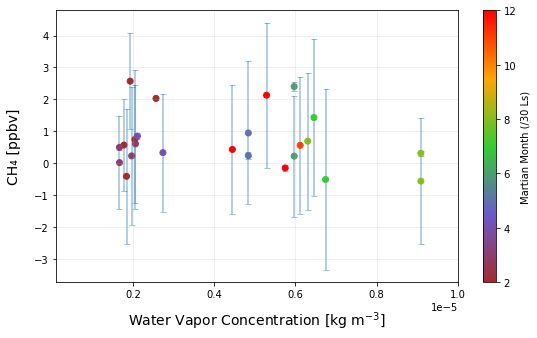

In [124]:
fig, axs = plt.subplots(1, 1, figsize= (9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = CH_month
cmap = cm.colors.LinearSegmentedColormap.from_list("",["brown","slateblue","limegreen","orange","red"],100000)
plt.errorbar(wv_CH, CH, yerr = CH_err, zorder=0, fmt="none", marker = "none", capsize=3, alpha = 0.45)
plt.scatter(wv_CH, CH, c=colors, cmap=cmap)
axs.set_xlim(10**(-7), 10**(-5))


axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.colorbar(label='Martian Month (/30 Ls)')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.xlabel('Water Vapor Concentration [kg m$^{-3}$]', labelpad = 10, fontsize = 14)
plt.ylabel('CH\N{SUBSCRIPT FOUR} [ppbv]', labelpad = 13, fontsize = 14)
plt.show()

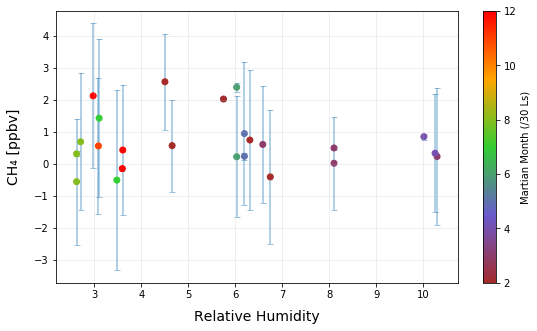

In [125]:
fig, axs = plt.subplots(1, 1, figsize= (9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = CH_month
cmap = cm.colors.LinearSegmentedColormap.from_list(" ",["brown","slateblue","limegreen","orange","red"],100000)
plt.errorbar(hum_CH, CH, yerr = CH_err, zorder=0, fmt="none", marker = "none", capsize=3, alpha = 0.45)
plt.scatter(hum_CH, CH, c=colors, cmap=cmap)



axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.colorbar(label='Martian Month (/30 Ls)')


plt.xlabel('Relative Humidity', labelpad = 10, fontsize = 14)
plt.ylabel('CH\N{SUBSCRIPT FOUR} [ppbv]', labelpad = 13, fontsize = 14)
plt.show()

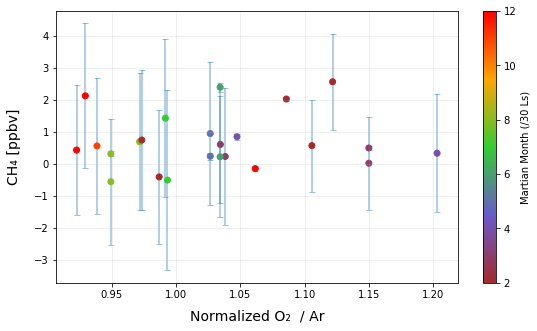

In [126]:
fig, axs = plt.subplots(1, 1, figsize= (9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = CH_month
cmap = cm.colors.LinearSegmentedColormap.from_list(" ",["brown","slateblue","limegreen","orange","red"],100000)
plt.errorbar(O2_CH, CH, yerr = CH_err, zorder=0, fmt="none", marker = "none", capsize=3, alpha = 0.45)
plt.scatter(O2_CH, CH, c=colors, cmap=cmap)



axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.colorbar(label='Martian Month (/30 Ls)')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.xlabel('Normalized O\N{SUBSCRIPT TWO}  / Ar', labelpad = 10, fontsize = 14)
plt.ylabel('CH\N{SUBSCRIPT FOUR} [ppbv]', labelpad = 13, fontsize = 14)
plt.show()

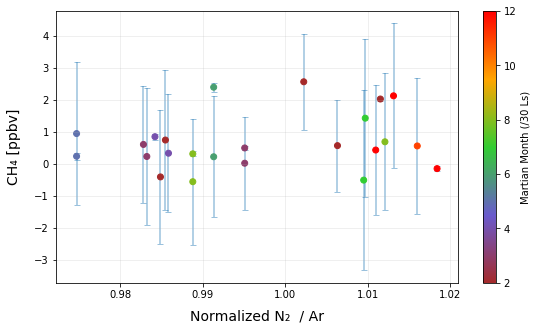

In [127]:
fig, axs = plt.subplots(1, 1, figsize= (9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = CH_month
cmap = cm.colors.LinearSegmentedColormap.from_list(" ",["brown","slateblue","limegreen","orange","red"],100000)
plt.errorbar(N2_CH, CH, yerr = CH_err, zorder=0, fmt="none", marker = "none", capsize=3, alpha = 0.45)
plt.scatter(N2_CH, CH, c=colors, cmap=cmap)



axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.colorbar(label='Martian Month (/30 Ls)')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.xlabel('Normalized N\N{SUBSCRIPT TWO}  / Ar', labelpad = 10, fontsize = 14)
plt.ylabel('CH\N{SUBSCRIPT FOUR} [ppbv]', labelpad = 13, fontsize = 14)
plt.show()

In [128]:
nCO_CH = CO_CH[:15]
nCH = CH[:15]
nerr = CH_err[:15]
nCH_CO_month = CH_month[:15]

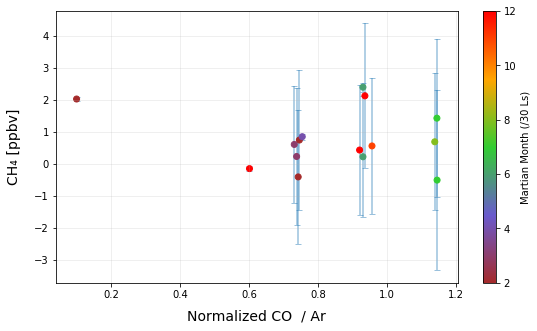

In [133]:
fig, axs = plt.subplots(1, 1, figsize= (9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = nCH_CO_month
cmap = cm.colors.LinearSegmentedColormap.from_list(" ",["brown","slateblue","limegreen","orange","red"],100000)
plt.errorbar(nCO_CH, nCH, yerr = nerr, zorder=0, fmt="none", marker = "none", capsize=3, alpha = 0.45)
plt.scatter(nCO_CH, nCH, c=colors, cmap=cmap)



axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.colorbar(label='Martian Month (/30 Ls)')

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.xlabel('Normalized CO  / Ar', labelpad = 10, fontsize = 14)
plt.ylabel('CH\N{SUBSCRIPT FOUR} [ppbv]', labelpad = 13, fontsize = 14)
plt.show()

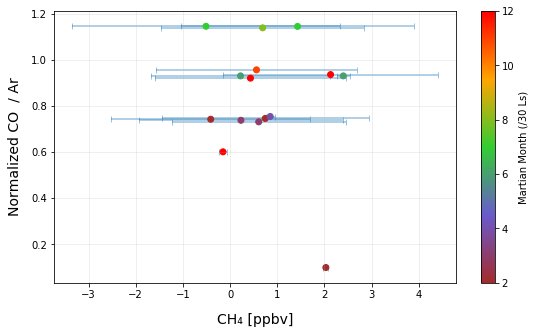

In [134]:
fig, axs = plt.subplots(1, 1, figsize= (9,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = nCH_CO_month
cmap = cm.colors.LinearSegmentedColormap.from_list(" ",["brown","slateblue","limegreen","orange","red"],100000)
plt.errorbar(nCH,nCO_CH,  xerr = nerr, zorder=0, fmt="none", marker = "none", capsize=3, alpha = 0.45)
plt.scatter(nCH, nCO_CH, c=colors, cmap=cmap)



axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.colorbar(label='Martian Month (/30 Ls)')

#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.ylabel('Normalized CO  / Ar', labelpad = 10, fontsize = 14)
plt.xlabel('CH\N{SUBSCRIPT FOUR} [ppbv]', labelpad = 13, fontsize = 14)
plt.show()